In [3]:
import numpy as np
import numpy.linalg as npla

import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline

In [4]:
def reverse_position_conversion(position_number):
    if position_number == 1:
        return "PG"
    elif position_number == 2:
        return "SG"
    elif position_number == 3:
        return "PF"
    elif position_number == 4:
        return "SF"
    elif position_number == 5:
        return "C"
    return "C"
def convert_position_to_number(position):
    position = position.upper()  # Convert the position to uppercase for case-insensitive comparison
    if position == "PG":
        return 1
    elif position == "SG":
        return 2
    elif position == "PF":
        return 3
    elif position == "SF":
        return 4
    elif position == "C":
        return 5
    return 1

In [5]:
data = np.loadtxt("fgPerc.csv", delimiter=",", skiprows=1, dtype=str)
clean = data[:, -4:]

# Iterate over the rows and convert the POSITION column
asNums = np.zeros(clean.shape)
count = 0
for row in clean:
    position = row[-1]
    position_number = convert_position_to_number(position)
    asNums[count,3] = int(position_number)
    asNums[count,0] = float(row[0])
    asNums[count,1] = float(row[1])
    asNums[count,2] = float(row[2])
    count += 1


print(asNums)

[[57.3 42.7 13.7  1. ]
 [69.1 30.9 28.7  4. ]
 [72.2 27.8  7.5  3. ]
 ...
 [64.5 35.5 10.5  1. ]
 [83.3 16.7  6.3  3. ]
 [79.7 20.3 30.4  5. ]]


In [6]:
d = asNums[:,:3]
f = asNums[:,3]
(n, p) = d.shape
print("Data set loaded: {} observations and {} columns\n".format(n, p))


M_2Pt = np.mean(asNums[:,0])
M_3Pt = np.mean(asNums[:,1])
M_min = np.mean(asNums[:,2])

Z = np.zeros([n,p])
Z[:, 0] = d[:,0] - M_2Pt
Z[:,1] = d[:,1] - M_3Pt
Z[:,2] = d[:,2] -M_min

print(Z)

Data set loaded: 623 observations and 3 columns

[[-11.36757624  11.52792937  -6.7988764 ]
 [  0.43242376  -0.27207063   8.2011236 ]
 [  3.53242376  -3.37207063 -12.9988764 ]
 ...
 [ -4.16757624   4.32792937  -9.9988764 ]
 [ 14.63242376 -14.47207063 -14.1988764 ]
 [ 11.03242376 -10.87207063   9.9011236 ]]


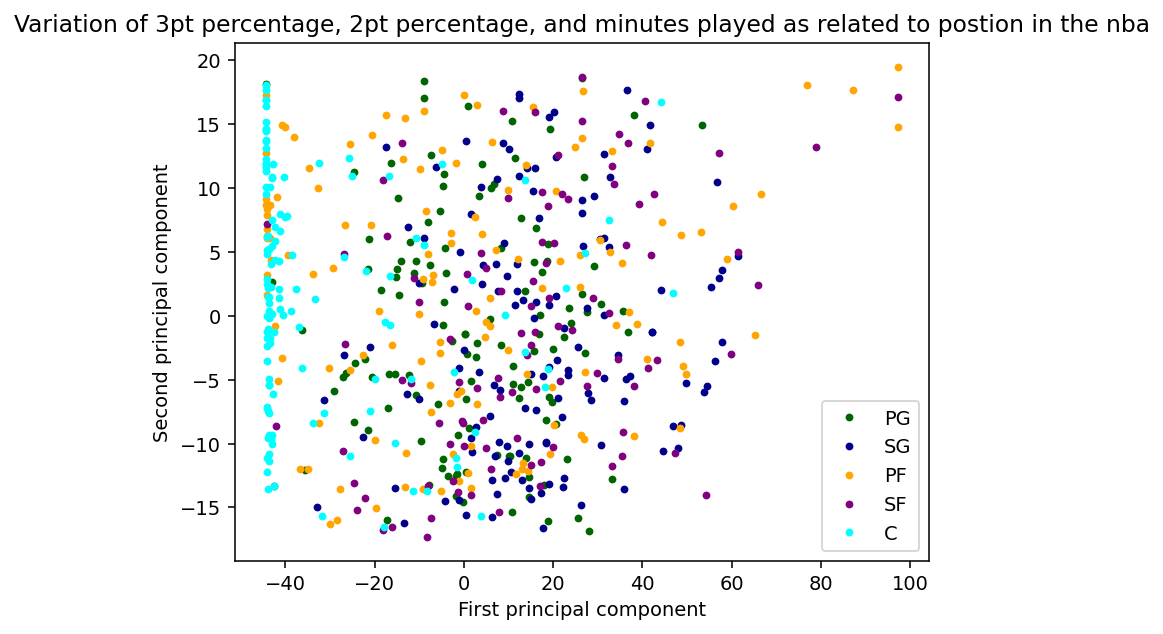

In [8]:
C = np.cov(np.transpose(Z))
s = npla.svd(C)[1]
u = npla.svd(C)[0]
    
principalComponent0, principalComponent1 = u[:,0], u[:,1]
x0 = Z @ principalComponent0
x1 = Z @ principalComponent1

fig = plt.figure(dpi=140)
ax = fig.add_subplot( 111 )
ax.set_title( "Variation of 3pt percentage, 2pt percentage, and minutes played as related to postion in the nba" )

colorValues = [(139, 0, 0),(0, 100, 0),(0, 0, 139), (255, 165, 0), (128, 0, 128),(0, 255, 255),(255, 165, 0), (128, 0, 128), (0, 128, 0)]
colors = [[r/255, g/255, b/255] for r, g, b in colorValues]

for i in range(1,6):
    ax.plot( x0[f == i], x1[f == i], color = colors[i], linestyle = '', marker = '.', label= reverse_position_conversion(i) )
ax.set_xlabel( "First principal component" )
ax.set_ylabel( "Second principal component" )
plt.legend(loc='lower right')
plt.show()




